In [1]:
import numpy as np

rng = np.random.default_rng(2020)

# Solve the n-Queen problem with Simulated Annealing.
#### What will be tested:
* That you understand every line of your code, not just copy from somewhere
* That your program compiles correctly
* Correctness of the program logic
* That the result is obtained in a reasonable time
#### What you need to do:
* Complete the `value` function
* Implement two search operators in `swap` and `permutation`
* Implement the replacement in `simulated_annealing`

In [2]:
class NQueenProblem:
    def __init__(self, grid, n, method) -> None:
        # grid is a 1D array, each element represents the position of a queen
        # In init state of the n-queen problem, if n = 8, grid = [0, 1, 2, 3, 4, 5, 6, 7]
        # represents the following state:
        # 1 0 0 0 0 0 0 0
        # 0 1 0 0 0 0 0 0
        # 0 0 1 0 0 0 0 0
        # 0 0 0 1 0 0 0 0
        # 0 0 0 0 1 0 0 0
        # 0 0 0 0 0 1 0 0
        # 0 0 0 0 0 0 1 0
        # 0 0 0 0 0 0 0 1
        # all queens in the initial state have conflicts with each other
        self.grid = grid
        self.n = n
        self.method = method

    def value(self):
        # TODO: evaluate the current state, return a scalar value
        # the evaluation function calculates the number of attacking pairs of queens on the board
        # return the number of conflicts
        diagConflicts = 0
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if abs(i - j) == abs(self.grid[i] - self.grid[j]):
                    diagConflicts += 1

        colCount = {}
        colConflicts = 0
        for col in self.grid: # bucket
            if col in colCount:
                colCount[col] += 1
            else:
                colCount[col] = 1
    
        for count in colCount.values():
            if count > 1:
                colConflicts += (count - 1)

        return diagConflicts + colConflicts

    def local_search(self):
        # generate a new grid
        new_grid = self.method(self.grid, self.n)
        return NQueenProblem(new_grid, self.n, self.method)

    def print_grid(self):
        matrix = np.zeros((self.n, self.n))
        for i in range(self.n):
            matrix[self.grid[i], i] = 1
        for i in range(self.n):
            for j in range(self.n):
                print(int(matrix[i, j]), end=' ')
            print()


#### Check the correctness of the value function:

In [3]:
grid = np.array([7,4,6,1,5,3,2,0])
problem = NQueenProblem(grid, 8, None)
problem.print_grid()
problem.value() # 5

0 0 0 0 0 0 0 1 
0 0 0 1 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 0 1 0 0 
0 1 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 0 1 0 0 0 0 0 
1 0 0 0 0 0 0 0 


5

In [4]:
def simulated_annealing(initial:NQueenProblem, schedule, halt, log_interval=200):
    state = initial
    t = 0           # count
    T = schedule(t) # schedule: function that determines the temp based on t
    f = [state.value()] # a recording of values aka conflicts counts
    while not halt(T):
        T = schedule(t)
        new_state = state.local_search()
        new_value = new_state.value()

        # TODO: implement the replacement here
        delta_value = new_value - state.value() # choose new state if better (LESS conflicts)
        if delta_value < 0 or rng.uniform(0, 1) < np.exp(-delta_value / T): # OR accept with certain prob (to escape local minima)
            state = new_state
            f.append(new_value)
        
        # update time and temperature
        if t % log_interval == 0:
            print(f"step {t}: T={T}, current_value={state.value()}")
        if new_value == 0: # no more conflicts (goal state)
            break
        t += 1
        T = schedule(t)
    print(f"step {t}: T={T}, current_value={state.value()}")
    return state, f

In [5]:
# Operator 1  
def swap(grid, n):
    new_grid = grid.copy() 
    i, j = np.random.choice(n, size=2, replace=False)  # pick 2 indices
    new_grid[i], new_grid[j] = new_grid[j], new_grid[i] 
    return new_grid  

# Operator 2 
def permutation(grid, n):
    new_grid = grid.copy()  
    np.random.shuffle(new_grid) 
    return new_grid 


In [6]:
#Run the simulated annealing algorithm for the N-Queens problem using Operator 1:swap and observe the results
rng = np.random.default_rng(200)
solution, record = simulated_annealing(
    initial=NQueenProblem(np.arange(12), 12, swap),
    schedule=lambda t: 0.999**t, # temp decrese rate
    halt=lambda T: T<1e-7, # anneal stops when T<1e-7
    log_interval=100
)
solution.print_grid()
solution.grid, solution.value()
#293, 259, 741, 758, 241

step 0: T=1.0, current_value=46
step 100: T=0.9047921471137089, current_value=2
step 200: T=0.8186488294786356, current_value=2
step 300: T=0.7407070321560992, current_value=5
step 400: T=0.6701859060067401, current_value=1
step 500: T=0.6063789448611847, current_value=2
step 506: T=0.6027497547577036, current_value=0
0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 1 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 


(array([ 5,  9, 11,  4, 10,  3,  0,  2,  8,  6,  1,  7]), 0)

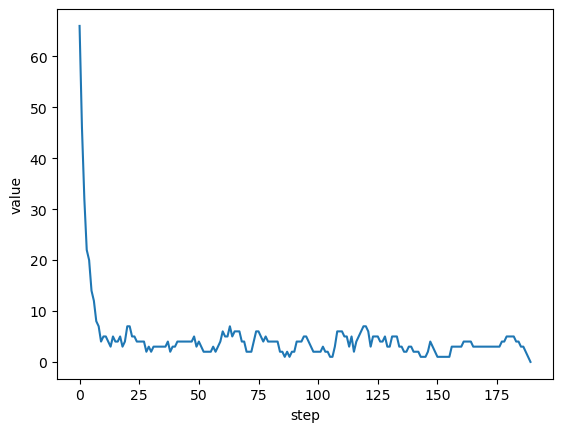

In [7]:
import matplotlib.pyplot as plt

plt.plot(record)
plt.xlabel('step')
plt.ylabel('value')
plt.show()

In [8]:
#Run the simulated annealing algorithm for the N-Queens problem using Operator 1:swap and observe the results
#Compare the effects of the two Operators and attempt to explain the differences.
solution, record = simulated_annealing(
    initial=NQueenProblem(np.arange(12), 12, permutation),
    schedule=lambda t: 0.999**t,
    halt=lambda T: T<1e-7,
    log_interval=200
)
solution.print_grid()
solution.grid, solution.value()

# 2591, 16032, failed, failed

step 0: T=1.0, current_value=7
step 200: T=0.8186488294786356, current_value=2
step 400: T=0.6701859060067401, current_value=2
step 600: T=0.5486469074854967, current_value=2
step 800: T=0.4491491486100751, current_value=4
step 1000: T=0.36769542477096373, current_value=3
step 1200: T=0.3010134290933991, current_value=2
step 1400: T=0.2464242913846615, current_value=3
step 1600: T=0.20173495769715533, current_value=2
step 1800: T=0.16515008698369826, current_value=2
step 2000: T=0.13519992539749945, current_value=2
step 2200: T=0.11068126067226176, current_value=2
step 2400: T=0.09060908449456684, current_value=2
step 2600: T=0.07417702096160793, current_value=2
step 2800: T=0.060724931384432544, current_value=1
step 3000: T=0.04971239399803616, current_value=1
step 3200: T=0.04069699315707305, current_value=1
step 3400: T=0.033316545811337896, current_value=1
step 3600: T=0.027274551230723105, current_value=1
step 3800: T=0.02232827943958655, current_value=1
step 4000: T=0.01827901982

(array([ 1,  4, 10,  5, 11,  2,  0,  7,  3,  8,  6,  9]), 0)

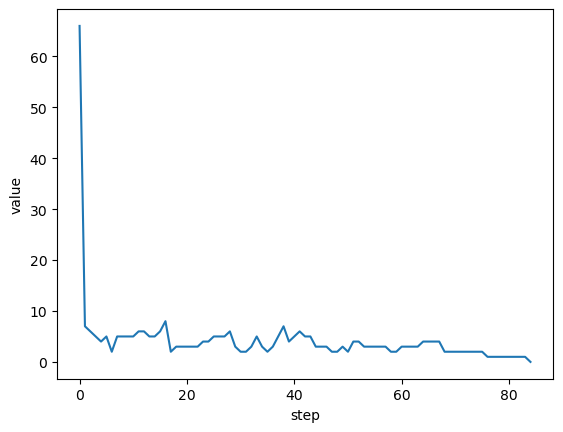

: 

In [9]:
plt.plot(record)
plt.xlabel('step')
plt.ylabel('value')
plt.show()